In [1]:
!pip install ftfy regex tqdm
!pip install git+https://github.com/openai/CLIP.git

Looking in indexes: https://nexus.iisys.de/repository/ki-awz-pypi-group/simple, https://pypi.org/simple
Looking in indexes: https://nexus.iisys.de/repository/ki-awz-pypi-group/simple, https://pypi.org/simple
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-r8le8mnq
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-r8le8mnq
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done


In [2]:
import torch
import clip
from PIL import Image

device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)

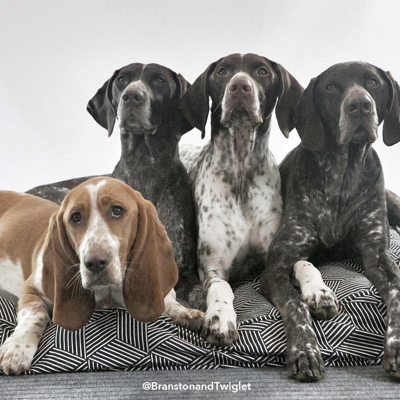

In [3]:
display(Image.open("images/dogs.jpg").resize((400,400)))

In [4]:
image = preprocess(Image.open("images/dogs.jpg")).unsqueeze(0).to(device)
text = clip.tokenize(["4 black dogs", "3 black dogs, 1 brown dog", "4 dogs"]).to(device)

with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    
    logits_per_image, logits_per_text = model(image, text)
    print(logits_per_text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

print("\nLabel probs:", probs)    
print("Der Titel '<Fill me in>' passt von den Titeln am Besten!")

tensor([[26.4219],
        [27.3281],
        [26.8125]], device='cuda:0', dtype=torch.float16)

Label probs: [[0.2019 0.4998 0.2983]]
Der Titel '<Fill me in>' passt von den Titeln am Besten!


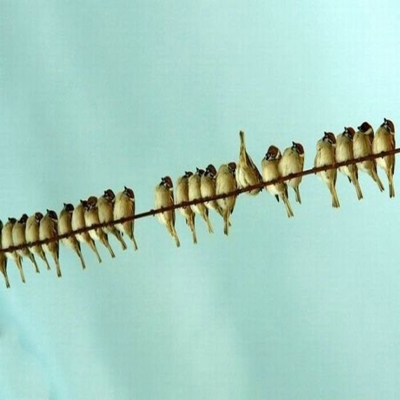

In [5]:
display(Image.open("images/Birds_on_a_Wire.jpg").resize((400,400)))

In [8]:
image = preprocess(Image.open("images/Birds_on_a_Wire.jpg")).unsqueeze(0).to(device)
text = clip.tokenize(["birds sitting on a wire", "birds sitting on a wire all looking the same direction", "birds all setting on a wire all looking the same direction except for one"]).to(device)

with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text)
    
    logits_per_image, logits_per_text = model(image, text)
    print(logits_per_text)
    probs = logits_per_image.softmax(dim=-1).cpu().numpy()

print("\nLabel probs:", probs)  
print("Der Titel '<Fill me in>' passt von den Titeln am Besten!")

print("Na, fällt was auf? ;)")

tensor([[31.5938],
        [30.3281],
        [30.1406]], device='cuda:0', dtype=torch.float16)

Label probs: [[0.6597 0.186  0.1543]]
Der Titel '<Fill me in>' passt von den Titeln am Besten!
Na, fällt was auf? ;)


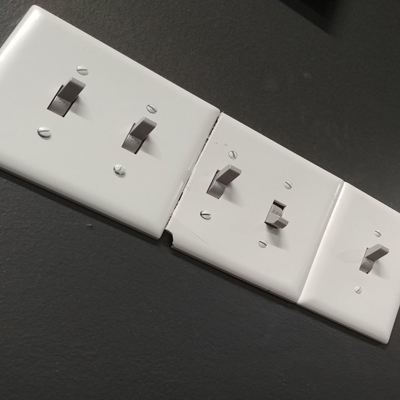

In [9]:
display(Image.open("images/Light-Switch.jpg").resize((400,400)))

In [10]:
image = preprocess(Image.open("images/Light-Switch.jpg")).unsqueeze(0).to(device)

guess="""A cool picture"""

text = clip.tokenize([guess]).to(device)

with torch.no_grad():
    image_features = model.encode_image(image)
    text_features = model.encode_text(text) 
    
    logits_per_image, logits_per_text = model(image, text)
    print(logits_per_image)
    
    job_done =any(x > 35 for x in logits_per_image[0])

print(f"Job done: {job_done}")

tensor([[23.6250]], device='cuda:0', dtype=torch.float16)
Job done: False
